In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.ticker import FuncFormatter

In [2]:
# Set plot size
dpi = 150
width = 1000 / dpi
height = 1000 / dpi

plt.rcParams['figure.figsize'] = (width, height)

In [3]:
def theme_custom():
    sns.set_theme(style="whitegrid")
    plt.gca().set_aspect(height / width)
    plt.rc('axes', titlesize=24, labelsize=20)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=14)

def theme_custom_ts():
    sns.set_theme(style="whitegrid")
    plt.gca().set_aspect(12 / 24)
    plt.gca().margins(0.01, 0.01)
    plt.rc('text', usetex=False)
    plt.rc('font', size=18)

def theme_custom_tiles():
    sns.set_theme(style="whitegrid")
    plt.xticks(rotation=90, ha='right', va='top', fontsize=18)
    plt.yticks(fontsize=18)
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)

In [4]:
import os
import pandas as pd

file_path = r'/home/abdr/work/Data-Analytics/GlobalTerrorismDA/globalterrorismdb_0718dist.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1') 

current_directory = os.path.dirname(os.path.abspath(file_path))
print("Current directory:", current_directory)
print("File exists:", os.path.exists(file_path))

# print(df.head())

/tmp/ipykernel_48423/2873710531.py:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


Current directory: /home/abdr/work/Data-Analytics/GlobalTerrorismDA
File exists: True


In [5]:
data = df[
    [
        # Time
        "iyear",           # Year
        "imonth",          # Month
        "iday",            # Day

        # Geospatial
        "latitude",        # Geo coordinate
        "longitude",       # Geo coordinate

        # Numerical
        "nperps",          # Number of perpetrators
        "nkill",           # Death toll
        "nwound",          # Number of casualties
        "nkillter",        # Death toll - terrorist only
        "propextent",      # Amount of damage done                  
        "ransomamt",       # Any ransom demanded?         

        # Binary
        "doubtterr",       # Was an act of terror?
        "vicinity",        # Did event occur in city?
        "ishostkid",       # Hostages?
        "extended",        # Duration above 24hrs?

        # Categorical
        "city",            # City        
        "country",         # Country id
        "region",          # Region id        
        "country_txt",     # Country name
        "region_txt",      # Region name  
        "attacktype1_txt", # Attack type description
        "weaptype1_txt",   # Weapon type description
        "targtype1_txt",   # Target type description

        # Text
        # "summary",      # Motive text variable (commented out like in R)
        "gname"            # Name of the organization
    ]
]

# print(data.head())

In [6]:
## Renaming

In [7]:
data = data.rename(columns={
    "iyear": "year",
    "imonth": "month",
    "iday": "day",
    "propextent": "damage",
    "latitude": "lat",
    "longitude": "long"
})

data["country"] = data["country_txt"]
data["region"] = data["region_txt"]
data["attack"] = data["attacktype1_txt"]
data["weapon"] = data["weaptype1_txt"]
data["target"] = data["targtype1_txt"]

data = data.drop(columns=["country_txt", "region_txt", "attacktype1_txt", "weaptype1_txt", "targtype1_txt"])

# output_path = './data/cleaned_globalterrorismdb.csv'
# data.to_csv(output_path, index=False)

# print(f"Data saved to {output_path}")

In [8]:
import numpy as np

data["attack"] = data["attack"].astype(str)

data["attack"] = np.where(data["attack"] == 'Facility/Infrastructure Attack', 'Infrastructure Attack', data["attack"])
data["attack"] = np.where(data["attack"] == 'Bombing/Explosion', 'Explosion', data["attack"])
data["attack"] = np.where(data["attack"] == 'Hostage Taking (Barricade Incident)', 'Hostage (Barricade)', data["attack"])
data["attack"] = np.where(data["attack"] == 'Hostage Taking (Kidnapping)', 'Hostage (Kidnapping)', data["attack"])

data["attack"] = data["attack"].astype('category')

print(data["attack"].head)

<bound method NDFrame.head of 0                 Assassination
1          Hostage (Kidnapping)
2                 Assassination
3                     Explosion
4         Infrastructure Attack
                  ...          
181686            Armed Assault
181687                Explosion
181688    Infrastructure Attack
181689                Explosion
181690                Explosion
Name: attack, Length: 181691, dtype: category
Categories (9, object): ['Armed Assault', 'Assassination', 'Explosion', 'Hijacking', ..., 'Hostage (Kidnapping)', 'Infrastructure Attack', 'Unarmed Assault', 'Unknown']>


In [9]:
data["target"] = data["target"].astype(str)

data["target"] = np.where(data["target"] == 'Government (General)', 'Government', data["target"])
data["target"] = np.where(data["target"] == 'Private Citizens & Property', 'Private', data["target"])

data["target"] = data["target"].astype('category')

print(data["target"].head())

0                    Private
1    Government (Diplomatic)
2        Journalists & Media
3    Government (Diplomatic)
4    Government (Diplomatic)
Name: target, dtype: category
Categories (22, object): ['Abortion Related', 'Airports & Aircraft', 'Business', 'Educational Institution', ..., 'Transportation', 'Unknown', 'Utilities', 'Violent Political Party']


In [10]:
data["country"] = data["country"].astype(str)

data["country"] = np.where(data["country"] == 'Democratic Republic of the Congo', 'Congo', data["country"])

data["country"] = data["country"].astype('category')

print(data["country"].head())

0    Dominican Republic
1                Mexico
2           Philippines
3                Greece
4                 Japan
Name: country, dtype: category
Categories (205, object): ['Afghanistan', 'Albania', 'Algeria', 'Andorra', ..., 'Yugoslavia', 'Zaire', 'Zambia', 'Zimbabwe']


In [11]:
data["gname"] = data["gname"].astype(str)

data["gname"] = np.where(data["gname"] == 'Islamic State of Iraq and the Levant (ISIL)', 'ISIL', data["gname"])
data["gname"] = np.where(data["gname"] == 'Al-Qaida in Iraq', 'Al-Qaida', data["gname"])
data["gname"] = np.where(data["gname"] == 'Al-Nusrah Front', 'Al-Nusrah', data["gname"])
data["gname"] = np.where(data["gname"] == 'Fulani extremists', 'Fulani', data["gname"])
data["gname"] = np.where(data["gname"] == 'Houthi extremists (Ansar Allah)', 'Ansar Allah', data["gname"])
data["gname"] = np.where(data["gname"] == 'Communist Party of India - Maoist (CPI-Maoist)', 'CPI - Maoist', data["gname"])
data["gname"] = np.where(data["gname"] == 'Tehrik-i-Taliban Pakistan (TTP)', 'TTP', data["gname"])

data["gname"] = data["gname"].astype('category')

print(data["gname"].head())

0                                MANO-D
1    23rd of September Communist League
2                               Unknown
3                               Unknown
4                               Unknown
Name: gname, dtype: category
Categories (3535, object): ['1 May', '14 K Triad', '14 March Coalition', '14th of December Command', ..., 'Zuwar al-Imam Rida', 'Zviadists', 'Zwai Tribe', 'leftist guerrillas-Bolivarian militia']


In [12]:
dimensions = data.shape

print(dimensions)

(181691, 22)


In [13]:
filtered_data = data[(data['year'] >= 2007) & 
                     (data['year'] <= 2017) & 
                     (data['doubtterr'] == 0)]

print(filtered_data.shape)

(83606, 22)


In [14]:
## Missing values

In [15]:
data.loc[data['doubtterr'] < 0, 'doubtterr'] = 0
data.loc[data['vicinity'] < 0, 'vicinity'] = 0
data.loc[data['extended'] < 0, 'extended'] = 0
data.loc[data['ishostkid'] < 0, 'ishostkid'] = 0

In [16]:
data['nperps'] = data['nperps'].apply(lambda x: 1 if x <= 0 else x)
data['nkill'] = data['nkill'].apply(lambda x: 0 if x < 0 else x)
data['nwound'] = data['nwound'].apply(lambda x: 0 if x < 0 else x)
data['nkillter'] = data['nkillter'].apply(lambda x: 0 if x < 0 else x)
data['ransomamt'] = data['ransomamt'].apply(lambda x: 0 if x < 0 else x)
data['damage'] = data['damage'].apply(lambda x: 0 if x < 0 else x)

# print(data.head())

In [17]:
data = data.fillna({
    'doubtterr': 0,
    'vicinity': 0,
    'extended': 0,
    'ishostkid': 0,
    'nperps': 1,
    'nkill': 0,
    'nwound': 0,
    'nkillter': 0,
    'ransomamt': 0,
    'damage': 0
})

print(data.head())

   year  month  day        lat        long  nperps  nkill  nwound  nkillter  \
0  1970      7    2  18.456792  -69.951164     1.0    1.0     0.0       0.0   
1  1970      0    0  19.371887  -99.086624     7.0    0.0     0.0       0.0   
2  1970      1    0  15.478598  120.599741     1.0    1.0     0.0       0.0   
3  1970      1    0  37.997490   23.762728     1.0    0.0     0.0       0.0   
4  1970      1    0  33.580412  130.396361     1.0    0.0     0.0       0.0   

   damage  ...  vicinity  ishostkid  extended           city  \
0     0.0  ...         0        0.0         0  Santo Domingo   
1     0.0  ...         0        1.0         0    Mexico city   
2     0.0  ...         0        0.0         0        Unknown   
3     0.0  ...         0        0.0         0         Athens   
4     0.0  ...         0        0.0         0        Fukouka   

              country                       region  \
0  Dominican Republic  Central America & Caribbean   
1              Mexico           

In [ ]:
## Types & formats

In [18]:
data['nperps'] = data['nperps'].apply(lambda x: 1 if x <= 0 else x)
data['nkill'] = data['nkill'].apply(lambda x: 0 if x < 0 else x)
data['nwound'] = data['nwound'].apply(lambda x: 0 if x < 0 else x)
data['nkillter'] = data['nkillter'].apply(lambda x: 0 if x < 0 else x)
data['ransomamt'] = data['ransomamt'].apply(lambda x: 0 if x < 0 else x)
data['damage'] = data['damage'].apply(lambda x: 0 if x < 0 else x)

print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   year       181691 non-null  int64   
 1   month      181691 non-null  int64   
 2   day        181691 non-null  int64   
 3   lat        177135 non-null  float64 
 4   long       177134 non-null  float64 
 5   nperps     181691 non-null  float64 
 6   nkill      181691 non-null  float64 
 7   nwound     181691 non-null  float64 
 8   nkillter   181691 non-null  float64 
 9   damage     181691 non-null  float64 
 10  ransomamt  181691 non-null  float64 
 11  doubtterr  181691 non-null  float64 
 12  vicinity   181691 non-null  int64   
 13  ishostkid  181691 non-null  float64 
 14  extended   181691 non-null  int64   
 15  city       181256 non-null  object  
 16  country    181691 non-null  category
 17  region     181691 non-null  object  
 18  gname      181691 non-null  category
 19  at

In [19]:
## Derived measures

In [20]:
data['month'] = data['month'].replace(0, 6)
data['day'] = data['day'].replace(0, 15)

data['date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

data = data.dropna(subset=['date'])

print(data.shape)

(181691, 23)


In [21]:
## Encoding

In [22]:
data['damage'] = data['damage'].replace({0: 'Unknown', 4: 'Unknown', 3: 'Low', 2: 'Medium', 1: 'High'})

data['damage'] = pd.Categorical(data['damage'])

In [23]:
## Data Exploration

In [24]:
data['date'] = pd.to_datetime(data['date'])
min_date = data['date'].min()
max_date = data['date'].max()
print(min_date)
print(max_date)

1970-01-01 00:00:00
2017-12-31 00:00:00


In [ ]:
## Categorical variables

/tmp/ipykernel_48423/1186704476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_city, x='nkill', y='city', palette='viridis')


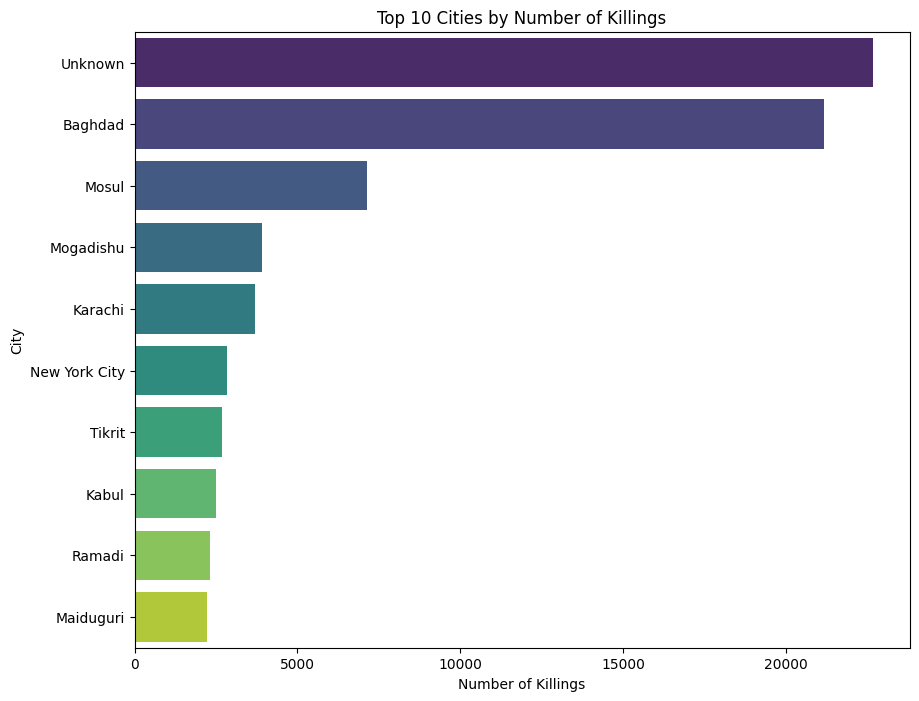

In [25]:
by_city = (data[data['city'] != '']
            .groupby('city')['nkill']
            .sum()
            .reset_index()
            .sort_values(by='nkill', ascending=False)
            .head(10))

plt.figure(figsize=(10, 8))
sns.barplot(data=by_city, x='nkill', y='city', palette='viridis')
plt.title('Top 10 Cities by Number of Killings')
plt.xlabel('Number of Killings')
plt.ylabel('City')
plt.show()

/tmp/ipykernel_48423/1963002071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_country = (data.groupby('country')['nkill']
/tmp/ipykernel_48423/1963002071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_country, y='country', x='nkill', palette='viridis')


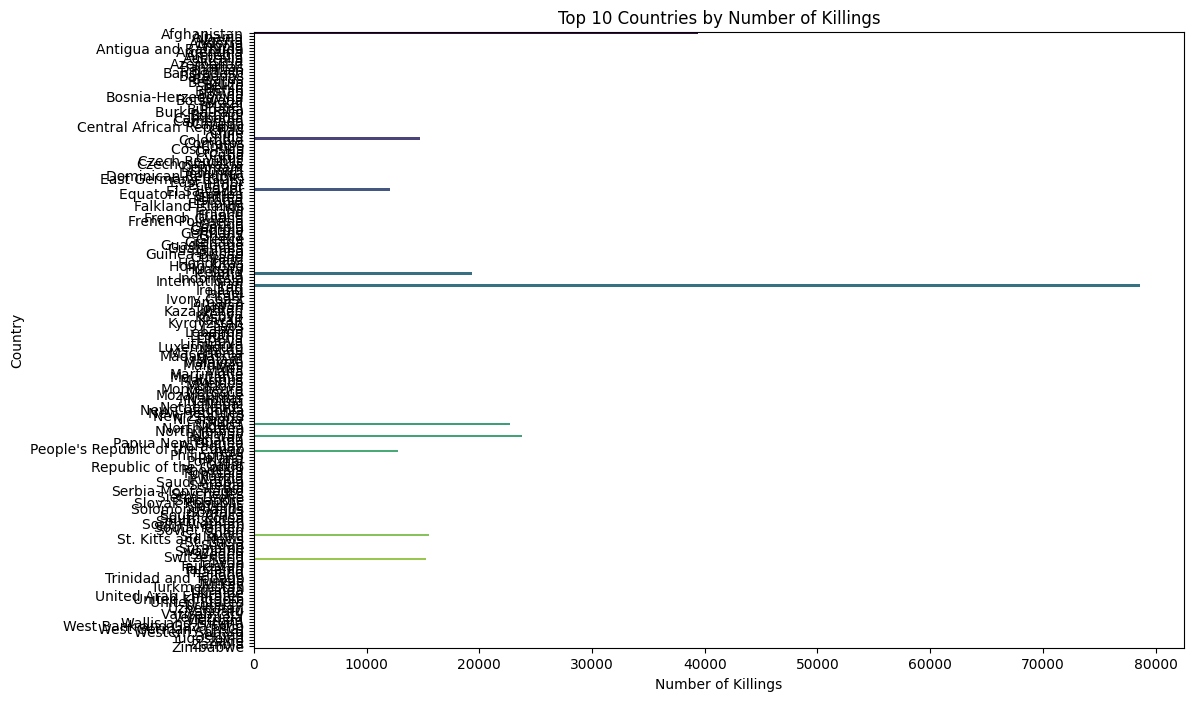

In [33]:
by_country = (data.groupby('country')['nkill']
              .sum()
              .reset_index()
              .sort_values(by='nkill', ascending=False)
              .head(10))

plt.figure(figsize=(12, 8))
sns.barplot(data=by_country, y='country', x='nkill', palette='viridis')
plt.title('Top 10 Countries by Number of Killings')
plt.xlabel('Number of Killings')
plt.ylabel('Country')
plt.show()


/tmp/ipykernel_48423/3887322937.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_region, x='nkill', y='region', palette='viridis')


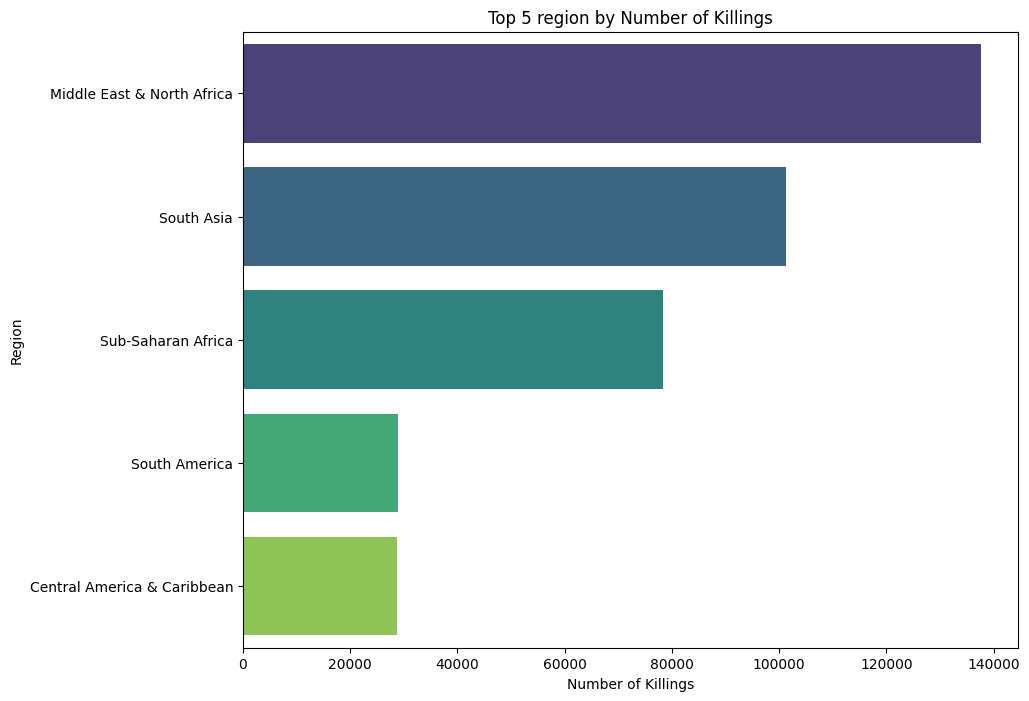

In [34]:
by_region = (data[data['region'] != '']
            .groupby('region')['nkill']
            .sum()
            .reset_index()
            .sort_values(by='nkill', ascending=False)
            .head(5))

plt.figure(figsize=(10, 8))
sns.barplot(data=by_region, x='nkill', y='region', palette='viridis')
plt.title('Top 5 region by Number of Killings')
plt.xlabel('Number of Killings')
plt.ylabel('Region')
plt.show()

damage
Unknown    137472
Low         43304
Medium        909
High            6
Name: count, dtype: int64


/tmp/ipykernel_48423/1307301011.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_damage = (data.groupby('damage')['nkill']
/tmp/ipykernel_48423/1307301011.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_damage, y='damage', x='nkill', palette='viridis')


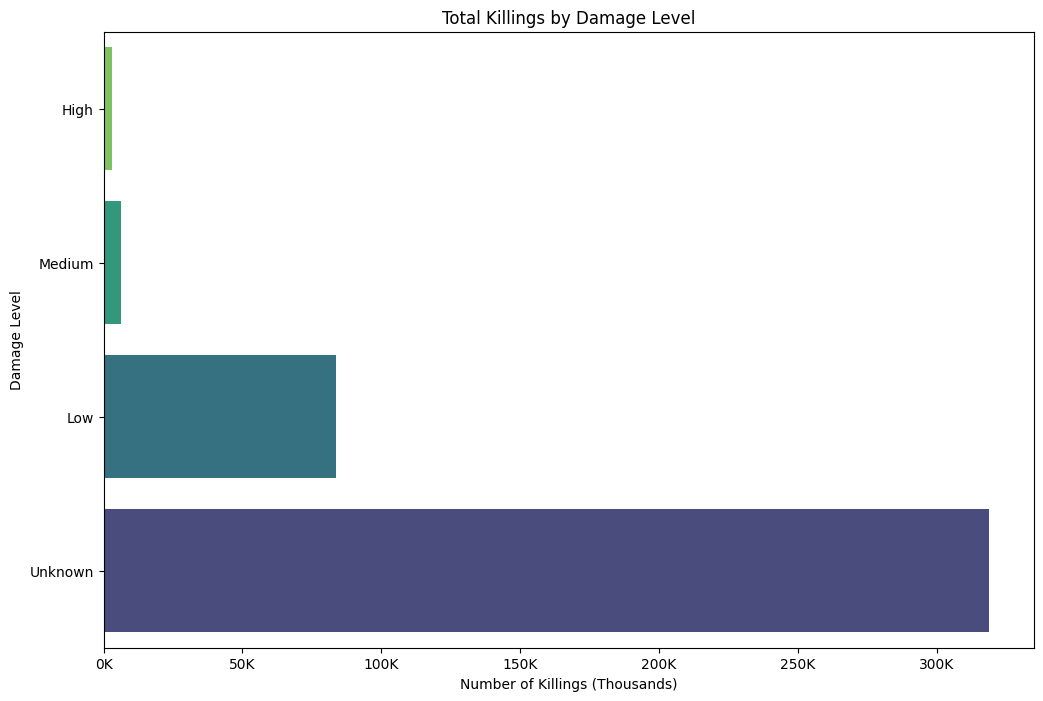

In [40]:
print(data['damage'].value_counts())

damage_order = ['Unknown', 'Low', 'Medium', 'High']
data['damage'] = pd.Categorical(data['damage'], categories=damage_order, ordered=True)

by_damage = (data.groupby('damage')['nkill']
             .sum()
             .reset_index()
             .sort_values(by='nkill', ascending=False))

plt.figure(figsize=(12, 8))
sns.barplot(data=by_damage, y='damage', x='nkill', palette='viridis')
plt.title('Total Killings by Damage Level')
plt.xlabel('Number of Killings (Thousands)')
plt.ylabel('Damage Level')
plt.gca().invert_yaxis()  # Flip the y-axis to match ggplot's coord_flip()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))  # Format x-axis
plt.show()
